# 「ガウス過程と機械学習」
# P.49 多変量ガウス分布の周辺化

2次元ガウス分布に関して、

$$
\vec x
=
\begin{pmatrix}
x_{1}\\
x_{2}
\end{pmatrix}
\sim
\mathcal{N}
\begin{pmatrix}
\mu_{1}&\Sigma_{11}&\Sigma_{12}\\
\mu_{2}&\Sigma_{21}&\Sigma_{22}
\end{pmatrix}
$$

$\mathcal{p}(\vec x) = \mathcal{p}(x_{1}, x_{2})$を$x_{2}$で周辺化した$\boldsymbol x_{1}$の分布は、

$$
\mathcal{p}(x_{1}) = \int \mathcal{p}(x_{1}, x_{2})dx_{2} = \mathcal{N}(\mu_{1}, \Sigma_{11})
$$

になる。つまり、$x_{2}$について周辺化することは、対応する$\mu_{2}$や共分散行列$\Sigma_{12}$、$\Sigma_{21}$、$\Sigma_{22}$を「見なかった」ことと同じになる。

In [1]:
using Distributions
using Plots
using StatsBase

In [2]:
μ₁ = μ₂ = 0.0

μ = [
    μ₁
    μ₂
]

Σ₁₁ = Σ₂₂ = 1.0
Σ₁₂ = Σ₂₁ = -0.7

Σ = [
    Σ₁₁ Σ₁₂ 
    Σ₂₁ Σ₂₂ 
]

data = rand(MvNormal(μ, Σ), 200)

2×200 Matrix{Float64}:
 -0.796772  0.30299   -0.693999   2.19841  …  -1.46028  -0.0297067  0.110337
  0.31328   0.402616  -0.590041  -1.58018      1.11948   0.0314023  0.166438

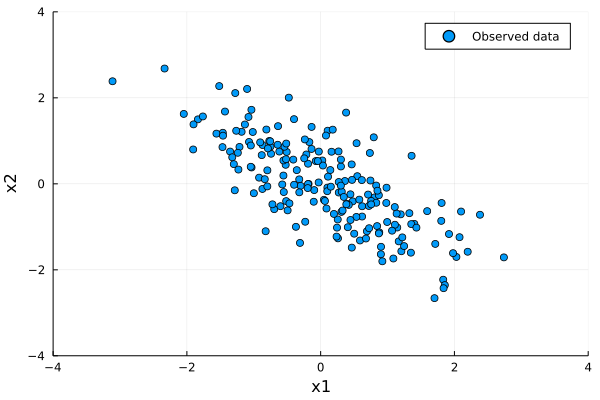

In [3]:
scatter(data[1, :], data[2, :], xlim=(-4,4), ylim=(-4,4), xlab="x1", ylab="x2", label="Observed data")

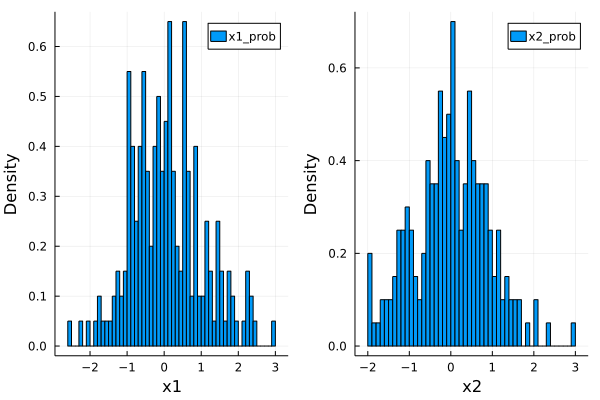

In [4]:
# x₂について周辺化したx₁の分布
p_x₁ = rand(Normal(μ₁, Σ₁₁), 200)

# x₁について周辺化したx₂の分布
p_x₂ = rand(Normal(μ₂, Σ₂₂), 200)

bins=80
plot(
    histogram(p_x₁; bins, norm=:pdf, xlab="x1", ylab="Density", label="x1_prob"),
    histogram(p_x₂; bins, norm=:pdf, xlab="x2", ylab="Density", label="x2_prob")
)